In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X_numpy, y_numpy= datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

In [4]:
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0], 1)

In [5]:
n_samples, n_features=X.shape

In [6]:
input_size= n_features
output_size=1
model=nn.Linear(input_size, output_size)

In [7]:
learning_rate=0.01
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)


epoch:10, loss:4129.1914
epoch:20, loss:2908.8606
epoch:30, loss:2076.7996
epoch:40, loss:1509.3544
epoch:50, loss:1122.2917
epoch:60, loss:858.2180
epoch:70, loss:678.0175
epoch:80, loss:555.0278
epoch:90, loss:471.0699
epoch:100, loss:413.7458


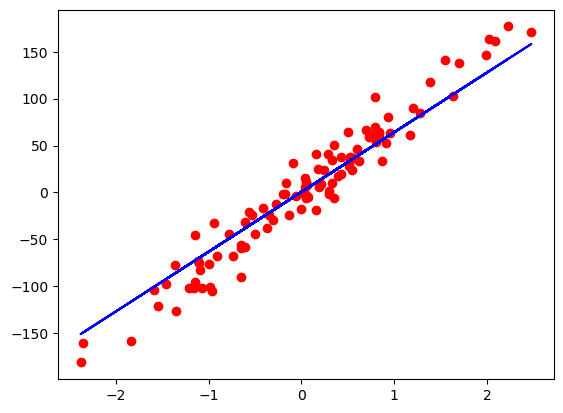

In [9]:
num_epochs=100
for epoch in range(num_epochs):
    y_predicted=model(X)
    loss=criterion(y_predicted, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1)%10==0:
        print(f'epoch:{epoch+1}, loss:{loss.item():.4f}')

predicted=model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()